# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

In [51]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
#for showing plots directly in the notebook
%matplotlib inline

In [52]:
df = pd.read_csv('C:/Users/pamel/Anaconda3/envs/DataAnalytics/workspace/Data_Analytics_Homework2/amazon-offers-10k-samples-new2.csv', encoding = "ISO-8859-1")

In [53]:
#test that we have the data
df.head()
#utf-8 encoding throwing an error - have I made some unwanted change to the csv as the old file still reads fine? 
#using ISO-8859-1 introduces a new 'unnamed' column?

,Unnamed: 0,IsWinner,ProductId,TimeOfOfferChange,ConditionNotes,IsFeaturedMerchant,IsFulfilledByAmazon,ListingPrice,SellerFeedbackRating,SellerFeedbackCount,SellerId,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours,ShipsFromCountry,ShipsFromState
0,1,1,-4.885260e+18,2016-02-04T04:26:52.136Z,Ready To Ship - We are unable to ship to PO Bo...,1,0,107.35,95,4078,-1.789490e+18,0.00,48,72,CA,ON
1,2,0,-4.885260e+18,2016-02-04T04:26:52.136Z,.,1,0,100.46,98,478,5.452080e+18,6.99,24,48,CA,ON
2,3,0,-4.885260e+18,2016-02-04T04:26:52.136Z,Fast shipping in Canada.,1,0,99.24,95,4384,-2.572280e+18,11.67,24,48,CA,ON
3,4,0,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,109.48,94,105,-8.704030e+18,8.99,24,48,CA,ON
4,5,0,-4.885260e+18,2016-02-04T04:26:52.136Z,NaN,0,0,116.70,67,9,1.929050e+18,6.98,24,48,CA,AB


# Question 1. Data Understanding: Exploring Relationships Between Feature Pairs

## 1.1 Print the correlations between the continuous features

In [54]:
df[['SellerFeedbackRating', 'SellerFeedbackCount', 'ListingPrice', 'ShippingPrice', 'ShippingTime_minHours', 'ShippingTime_maxHours']].corr()

,SellerFeedbackRating,SellerFeedbackCount,ListingPrice,ShippingPrice,ShippingTime_minHours,ShippingTime_maxHours
SellerFeedbackRating,1.000000,0.105576,-0.037842,-0.005308,-0.163926,-0.176798
SellerFeedbackCount,0.105576,1.000000,-0.001166,-0.202074,0.295287,0.212978
ListingPrice,-0.037842,-0.001166,1.000000,0.215024,0.038674,0.032914
ShippingPrice,-0.005308,-0.202074,0.215024,1.000000,-0.016701,0.036349
ShippingTime_minHours,-0.163926,0.295287,0.038674,-0.016701,1.000000,0.973911
ShippingTime_maxHours,-0.176798,0.212978,0.032914,0.036349,0.973911,1.000000


## 1.2 Plot the scatter plots of each pair of continuous descriptive feature and target feature

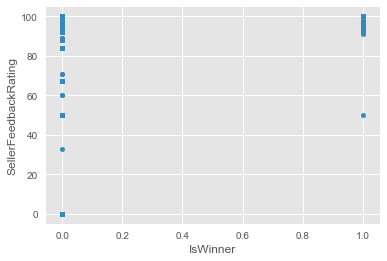

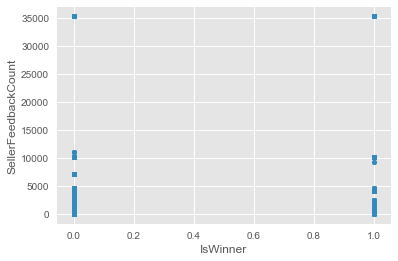

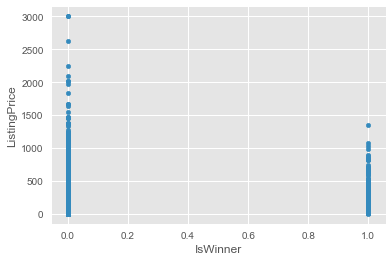

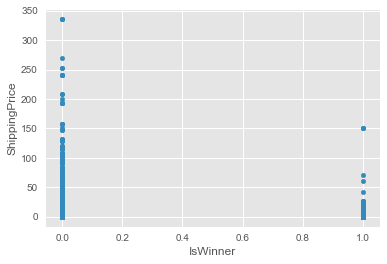

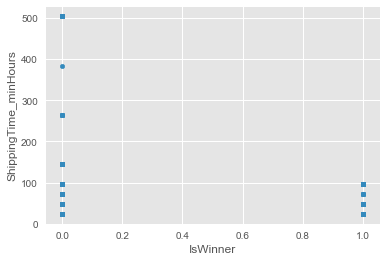

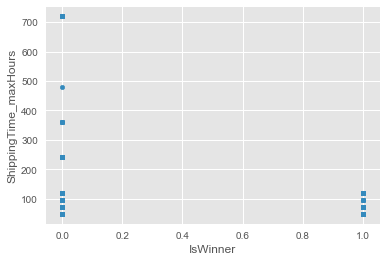

In [55]:
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackRating')
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackCount')
df.plot(kind='scatter', x='IsWinner', y='ListingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_minHours')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_maxHours')

#negative values - do I need to go back at look at removing outliers? 

## 1.3 Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices. 

1. Seller Feedback Rating looks promising - from the scatter plot we can see that there is a correlation between sellers with ratings above 80 and the target feature. While we can see that it isn't conclusive that the offer would be in the positive class based solely on this, it could act as a way to reduce the probability of an offer being in the positive class - if the seller rating is below the threshold.
2. We can see a similar pattern in regard to Listing Price. There are no cases in the positive class above the Listing Price of 1500 dollars - this is something we could look at further. 
3. Shipping Price is similar to Listing Price. There are no positive cases above 100 dollars except one instance which could be an outlier. This is something that we could look at further also. 

## 1.4 For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots). 

In [56]:
%matplotlib inline

#define our categorical features
categorical_features = ['IsWinner', 'IsFeaturedMerchant', 'IsFulfilledByAmazon',
                        'ShipsFromCountry', 'ShipsFromState', 'ConditionNotes']

categorical_columns = df[categorical_features].columns


(0, 100)

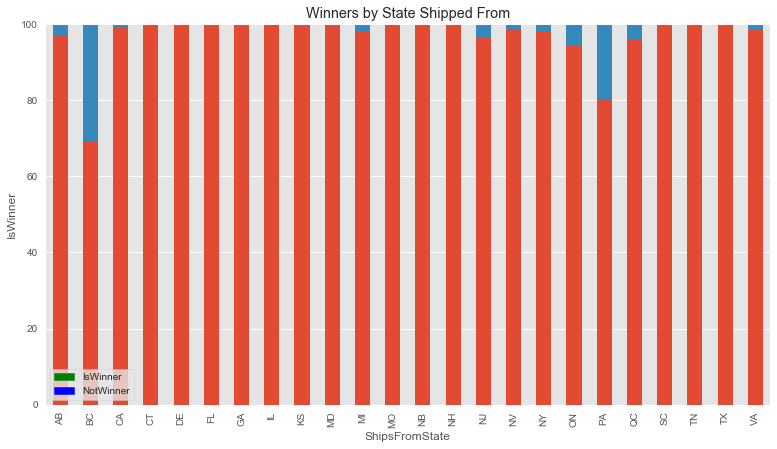

In [57]:
# Find unique values in ShipsFromState

states = pd.unique(df.ShipsFromState.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in State and for each value count the amount of winners
# Find the indexes of each row with a particular state and for each of these row insert count * 100 in the percent column
for s in states:
    count = 1 / df[df.ShipsFromState == s].count()['IsWinner']
    index_list = df[df['ShipsFromState'] == s].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100


category_group = df[['percent', 'ShipsFromState','IsWinner']].groupby(['ShipsFromState','IsWinner']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by State Shipped From", figsize=(13,7))

red_patch = mpatches.Patch(color='green', label='IsWinner')
blue_patch = mpatches.Patch(color='blue', label='NotWinner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("ShipsFromState")
my_plot.set_ylabel("IsWinner")
my_plot.set_ylim([0,100])

(0, 100)

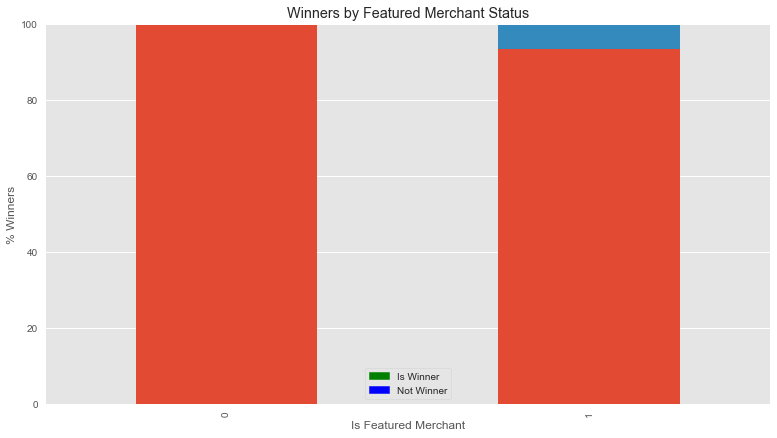

In [58]:
# Count the number of female candidates
count_is = 1 / df[df.IsFeaturedMerchant == 1].count()['IsFeaturedMerchant']

# Counts the number of male candidates
count_isnot = 1 / df[df.IsFeaturedMerchant == 0].count()['IsFeaturedMerchant']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = count_isnot * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['IsFeaturedMerchant'] == 1].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = count_is * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Featured Merchant Status", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Is Featured Merchant")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

(0, 100)

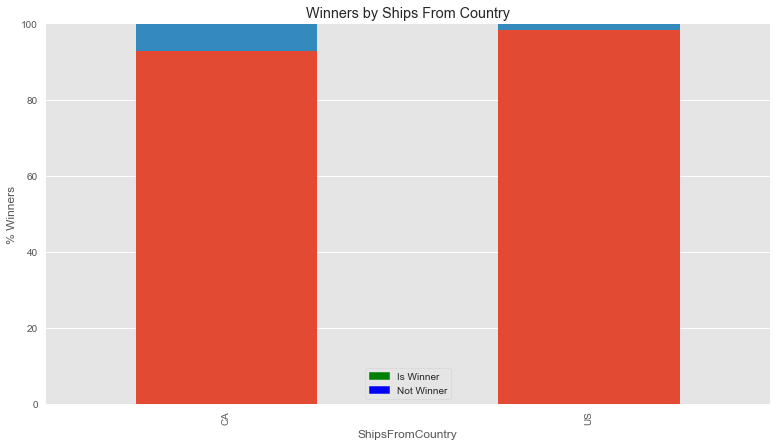

In [59]:
# Count the number of female candidates
count_CA = 1 / df[df.ShipsFromCountry == 'CA'].count()['ShipsFromCountry']

# Counts the number of male candidates
count_US = 1 / df[df.ShipsFromCountry == 'US'].count()['ShipsFromCountry']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = count_US * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['ShipsFromCountry'] == 'CA'].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = count_CA * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Ships From Country", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromCountry")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

C:\Users\pamel\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in longlong_scalars
  from ipykernel import kernelapp as app


(0, 100)

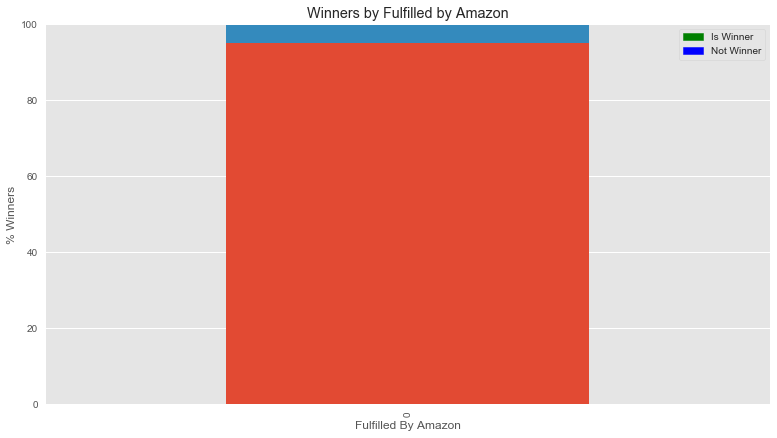

In [60]:
# Count the number of female candidates
count_is = 1 / df[df.IsFulfilledByAmazon == 1].count()['IsFulfilledByAmazon']

# Counts the number of male candidates
count_isnot = 1 / df[df.IsFulfilledByAmazon == 0].count()['IsFulfilledByAmazon']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = count_isnot * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['IsFulfilledByAmazon'] == 1].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = count_is * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsFulfilledByAmazon','IsWinner']].groupby(['IsFulfilledByAmazon','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Fulfilled by Amazon", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Fulfilled By Amazon")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

## 1.5 Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices. 

1. Ships From State seems to be the most informative - there are a high number of winners from BC (British Columbia) and CA (California). 
For the rest of the features, it is difficult to tell which are good indicators. There doesn't seem to be a high correlation between any of them and the target feature. 

# Question 2: Predictive Modeling: Linear Regression

## 2.1 Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [133]:
#should categorical features be in here? Is descriptive continuous or categorical or both? 
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# Multiple Linear Regression
#Is a descriptive feature continuous or categorical? 
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="IsWinner ~ ListingPrice + ShippingPrice + SellerFeedbackRating + ShipsFromCountry + ShipsFromState", data=df).fit()

Discussion: Unsure yet how to discuss without observing firs the coefficients at least? 

## 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model. 

In [134]:
# Print the model weights/parameters
print(lm.params)

Intercept                 0.010748
ShipsFromCountry[T.US]   -0.009928
ShipsFromState[T.BC]      0.272139
ShipsFromState[T.CA]     -0.016157
ShipsFromState[T.CT]     -0.030239
ShipsFromState[T.DE]     -0.017140
ShipsFromState[T.FL]     -0.011296
ShipsFromState[T.GA]     -0.009388
ShipsFromState[T.IL]     -0.018178
ShipsFromState[T.KS]     -0.021514
ShipsFromState[T.MD]     -0.005670
ShipsFromState[T.MI]     -0.003736
ShipsFromState[T.MO]     -0.028249
ShipsFromState[T.NB]     -0.027222
ShipsFromState[T.NH]     -0.018966
ShipsFromState[T.NJ]      0.017960
ShipsFromState[T.NV]     -0.013375
ShipsFromState[T.NY]     -0.008624
ShipsFromState[T.ON]      0.021552
ShipsFromState[T.PA]      0.199391
ShipsFromState[T.QC]      0.002997
ShipsFromState[T.SC]     -0.011130
ShipsFromState[T.TN]     -0.000012
ShipsFromState[T.TX]     -0.013709
ShipsFromState[T.VA]      0.000104
ListingPrice              0.000014
ShippingPrice            -0.000291
SellerFeedbackRating      0.000269
dtype: float64


From the above coefficients we can see that the statistically relevant features are ShipsFromState where that state is BC, TN, ON, PA, QC, or VA; Listing Price and Seller Feedback Rating. 

The others are all in the negative meaning that an increase in those features does not equate to an increase in the likelyhood of an offer becoming a winner. 

What we need to look at now is how we can reorganise the data contained within the Ships From State column. 

Reference for interpreting coefficients: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

In [139]:
# create dummy variables using get_dummies, #normally exclude the first dummy column
# but because there are so many categories here I have chosen to include it
ShipsFromState_dummies = pd.get_dummies(df.ShipsFromState, prefix='ShipsFrom').iloc[:, :]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, ShipsFromState_dummies], axis=1)

#now we can look at only the statistically significant parts of Ships From State

In [132]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.884
Date:                Sun, 09 Apr 2017   Prob (F-statistic):           0.000525
Time:                        18:51:19   Log-Likelihood:                 514.40
No. Observations:                5851   AIC:                            -1021.
Df Residuals:                    5847   BIC:                            -994.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0136      0.022      0.610      0.542        -0.030     0.057
ListingPrice          5.659e-06   1.19e-05      0.477      0.633     -1.76e-05  2.89e-05
ShippingPrice           -0.0006      0.000     -3.670      0.000        -0.001    -0.000
SellerFeedbackRating     0.0005      0.000      2.018      0.044      1.34e-05     0.001
==============================================================================
Omnibus:                     4681.256   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64971.220
Skew:                           4.019   Prob(JB):                         0.00
Kurtosis:                      17.209   Cond. No.                     2.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Evalutation: Only Ships From British Columbia has a P value or below 0.05??? Doesn't leave me very much to work with. 
R-squared is very low meaning that the model does not fit the data well? 

## 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quailty of the model on the training set. 

In [160]:
#how to separate the states that are pertinent? 

lm = sm.ols(formula="IsWinner ~ ListingPrice + SellerFeedbackRating + ShipsFrom_BC + ShipsFrom_TN + ShipsFrom_ON + ShipsFrom_PA + ShipsFrom_QC + ShipsFrom_VA", data=df).fit()
print(lm.params)

Intercept              -0.012090
ListingPrice            0.000009
SellerFeedbackRating    0.000299
ShipsFrom_BC[0]         0.097040
ShipsFrom_BC[1]         0.097040
ShipsFrom_BC[2]         0.097040
ShipsFrom_TN[0]         0.003861
ShipsFrom_TN[1]         0.003861
ShipsFrom_TN[2]         0.003861
ShipsFrom_ON[0]         0.013180
ShipsFrom_ON[1]         0.013180
ShipsFrom_ON[2]         0.013180
ShipsFrom_PA[0]         0.068416
ShipsFrom_PA[1]         0.068416
ShipsFrom_PA[2]         0.068416
ShipsFrom_QC[0]         0.007301
ShipsFrom_QC[1]         0.007301
ShipsFrom_QC[2]         0.007301
ShipsFrom_VA[0]        -0.000704
ShipsFrom_VA[1]        -0.000704
ShipsFrom_VA[2]        -0.000704
dtype: float64


In [161]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     63.36
Date:                Sun, 09 Apr 2017   Prob (F-statistic):          6.00e-100
Time:                        19:23:03   Log-Likelihood:                 749.00
No. Observations:                5851   AIC:                            -1480.
Df Residuals:                    5842   BIC:                            -1420.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -0.0121      0.023     -0.521      0.603        -0.058     0.033
ListingPrice          8.878e-06   1.12e-05      0.794      0.427      -1.3e-05  3.08e-05
SellerFeedbackRating     0.0003      0.000      1.224      0.221        -0.000     0.001
ShipsFrom_BC[0]          0.0970      0.004     21.966      0.000         0.088     0.106
ShipsFrom_BC[1]          0.0970      0.004     21.966      0.000         0.088     0.106
ShipsFrom_BC[2]          0.0970      0.004     21.966      0.000         0.088     0.106
ShipsFrom_TN[0]          0.0039      0.023      0.170      0.865        -0.041     0.048
ShipsFrom_TN[1]          0.0039      0.023      0.170      0.865        -0.041     0.048
ShipsFrom_TN[2]          0.0039      0.023      0.170      0.865        -0.041     0.048
ShipsFrom_ON[0]          0.0132      0.002      5.889      0.000         0.009     0.018
ShipsFrom_ON[1]          0.0132      0.002      5.889      0.000         0.009     0.018
ShipsFrom_ON[2]          0.0132      0.002      5.889      0.000         0.009     0.018
ShipsFrom_PA[0]          0.0684      0.032      2.115      0.034         0.005     0.132
ShipsFrom_PA[1]          0.0684      0.032      2.115      0.034         0.005     0.132
ShipsFrom_PA[2]          0.0684      0.032      2.115      0.034         0.005     0.132
ShipsFrom_QC[0]          0.0073      0.003      2.692      0.007         0.002     0.013
ShipsFrom_QC[1]          0.0073      0.003      2.692      0.007         0.002     0.013
ShipsFrom_QC[2]          0.0073      0.003      2.692      0.007         0.002     0.013
ShipsFrom_VA[0]         -0.0007      0.004     -0.164      0.870        -0.009     0.008
ShipsFrom_VA[1]         -0.0007      0.004     -0.164      0.870        -0.009     0.008
ShipsFrom_VA[2]         -0.0007      0.004     -0.164      0.870        -0.009     0.008
==============================================================================
Omnibus:                     4374.778   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56801.475
Skew:                           3.657   Prob(JB):                         0.00
Kurtosis:                      16.397   Cond. No.                     1.12e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.17e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
# create X and y
feature_cols = ['ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC', 'ShipsFrom_TN', 'ShipsFrom_TN', 'ShipsFrom_ON', 'ShipsFrom_PA', 'ShipsFrom_QC', 'ShipsFrom_VA']
X = df[feature_cols]
Y = df.IsWinner

# instantiate, fit
lm = LinearRegression()
lm.fit(X, Y)

# print coefficients
for i in range(len(feature_cols) - 1):
    print(feature_cols[i], lm.coef_[i])

    
#print(feature_cols, lm.coef_) # need to format more nicely

ListingPrice 8.8782887203e-06
SellerFeedbackRating 0.000299382462888
ShipsFrom_BC 0.0970396403928
ShipsFrom_TN 0.0970396403928
ShipsFrom_TN 0.0970396403928
ShipsFrom_ON 0.00193050443581
ShipsFrom_PA 0.00193050443581
ShipsFrom_QC 0.00193050443581


### Evaluating the quality of the model

In [157]:
#manually calculate the prediction
#do you do this with multiple linear regression?
0.008810 + -0.000004 + 0.00469 * 100

0.47780599999999995

In [158]:
#calculate the R-squared
lm.score(X, Y)

0.079838372926838597

## 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 get the predicted class for each example. 

# Question 3: Predictive Modeling: Logistic Regression

## 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

## 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g. interpret the model). 

## 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set. 

## 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

# Question 4: Predictive Modeling: Random Forest

## 4.1 Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

## 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising. 

## 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set. 

## 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

# Question 5: Evaluating Predictive Models


## 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing. 

## 5.2 Summarize and try to improve your results so far

## 5.2.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers. 

## 5.2.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find  any tricks to improve the best model so far (e.g., using feature significance, feature rescaling, creating new features, combining models, or other knowledge)?